# 1. Aufnahme und Analyse eines Grauwertkeiles
Schreiben Sie eine Routine, die das Bild einliest (Befehl: pyopencv.imread()) und die
einzelnen Grauwertstufen als Unterbilder aus dem Originalbild ausliest. Schauen Sie sich
dazu nochmals das Thema Indizierung und Index Slicing aus der Python-Einführung
an.

In [4]:
import cv2
import numpy as np


image = cv2.imread('Messungen/grauwertkeil.png', cv2.IMREAD_GRAYSCALE)
#print(image)

steps = []

start =  [10, 110, 250, 390, 520]
end =    [90, 230, 370, 510, 620]

for i in range(5):
    steps.append(image[20:460, start[i]:end[i]])

print("\t\tmean\t\t\tstd")
for index, step in enumerate(steps):
    step_array = np.array(step)
    print(f"{index+1}\t{np.mean(step_array)}\t {np.std(step_array)}")

		mean			std
1	64.98590909090909	 4.5946207768046134
2	102.41204545454545	 2.955187846830569
3	148.65075757575758	 3.0716567489963342
4	196.47823863636364	 3.4391875917922152
5	246.70654545454545	 6.558070868834916


# 2.+3. Aufnahme eines Dunkelbildes & Weißbildes

TypeError: Image data of dtype object cannot be converted to float

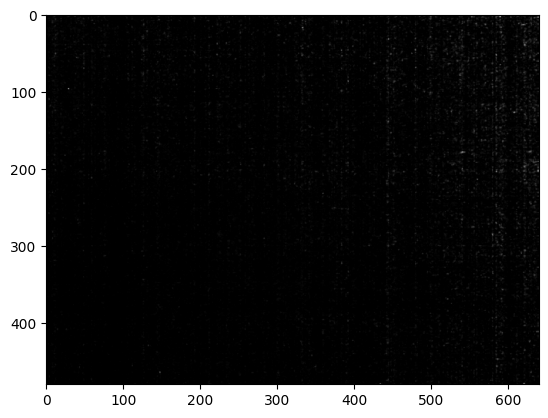

In [21]:
import cv2
import numpy as np
import os

# Dunkelbild erstellen
dunkelbilder = []
for i in range(0, 10):
    dunkelbild_path = f"./Messungen/black_{i}.png"
    dunkelbild = cv2.imread(dunkelbild_path, cv2.IMREAD_GRAYSCALE)

    if dunkelbild is None:
        print(f"Fehler beim Lesen des Dunkelbilds: {dunkelbild_path}")
    else:
        dunkelbilder.append(dunkelbild)

if not dunkelbilder:
    print("Keine Dunkelbilder gefunden.")
    exit()

dunkelbilder_array = np.array(dunkelbilder)
dunkelbild_mean = np.mean(dunkelbilder_array, axis=0)
dunkelbild_contrast = cv2.convertScaleAbs(dunkelbild_mean, alpha=1.0, beta=0)
cv2.imwrite("dunkelbild_contrast.png", dunkelbild_contrast)
print("Kontrastmaximiertes Dunkelbild:\n\n", dunkelbild_contrast)



print("Mittelwerte Dunkelbild:\n\n", dunkelbild_mean)

#------------------------------

# Weißbild erstellen
weißbilder = []
for i in range(10):
    weißbild_path = f"./Messungen/weissBild{i}.png"
    weißbild = cv2.imread(weißbild_path, cv2.IMREAD_GRAYSCALE)

    if weißbild is None:
        print(f"Fehler beim Lesen des Weißbilds: {weißbild_path}")
    else:
        weißbilder.append(weißbild)

if not weißbilder:
    print("Keine Weißbilder gefunden.")
    exit()

weißbilder_array = np.array(weißbilder)
#Weisses Mittelwertbild
weißbild_mean = np.mean(weißbilder_array, axis=0)
print("Mittelwerte Weissbild:\n\n", weißbild_mean)


weißbild_mean = weißbild_mean - dunkelbild_mean
print("Weißbild_mean - dunkelbild_mean:\n\n", weißbild_mean)


cv2.imwrite("weissbild_mean.png", weißbild_mean)
# Kontrastmaximierung des Weißbilds
weißbild_contrast = cv2.convertScaleAbs(weißbild_mean, alpha=3.0, beta=0)
print("Kontrastmaximiertes Weissbild:\n\n", weißbild_contrast)

cv2.imwrite("weissbild_contrast.png", weißbild_contrast)

# Normalisierung des Kontrast-maximierten Weißbilds
weißbild_normalized = weißbild_contrast / np.mean(weißbild_mean)
print("Normalisierte Weissbild:\n\n", weißbild_normalized)


bild_path = "./Messungen/grauwertkeil.png"
bild = cv2.imread(bild_path, cv2.IMREAD_GRAYSCALE)

if bild is None:
    print(f"Fehler beim Lesen des Beispielbilds: {bild_path}")
    exit()

# Korrektur des Grauwertkeils
# Das durch Abzug des Dunkelbildes korrigierte Eingangsbild wird anschliessend durch das normierte Weißbild dividiert.
graustufenkeil_korrigiert = (bild - dunkelbild_mean) / weißbild_normalized
cv2.imwrite("grauwertkeil_korrigiert.png", graustufenkeil_korrigiert)
print("Korrigierte Grauwertkeil:\n\n", graustufenkeil_korrigiert)


# 4.Pixelfehler

## Überprüfen Sie Ihr Dunkelbild auf dem Bildschirm auf stuck und hot pixels und Ihr
Weißbild auf dead pixels. Markieren Sie diese im Bild und fügen es in Ihr Notebook
ein.

In [ ]:
import cv2
import numpy as np

# Finden der Koordinaten der Deadpixels im weißbild_contrast
deadpixels = np.argwhere(weißbild_contrast == 0)

#  Finden der Koordinaten der Stuckpixels im dunkelbild_contrast
stuckpixels = np.argwhere(dunkelbild_contrast == 255)

# Erstellen von Kopien des Originalbildes
stuckpixel_image = bild.copy()
deadpixel_image = bild.copy()

#  Markieren und Visualisieren der Stuckpixels im Bild
for (x, y) in stuckpixels:
    stuckpixel_image = cv2.circle(img=stuckpixel_image, center=(x, y), radius=1, color=(255, 0, 0), thickness=2)

# Markieren und Visualisieren der Deadpixels im Bild
for (x, y) in deadpixels:
    deadpixel_image = cv2.circle(img=deadpixel_image, center=(x, y), radius=1, color=(0, 0, 255), thickness=2)

# Speichern und anzeigen
cv2.imwrite("stuckpixel_image.png", stuckpixel_image)
cv2.imwrite("deadpixel_image.png", deadpixel_image)
cv2.imshow("Stuckpixels", stuckpixel_image)
cv2.imshow("Deadpixels", deadpixel_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 8. Ausgeben der Koordinaten von Stuckpixels und Deadpixels
print(f"Stuckpixels coordinates: {stuckpixels}")
print(f"Deadpixels coordinates: {deadpixels}")


QObject::moveToThread: Current thread (0x228cf50) is not the object's thread (0x225c5d0).
Cannot move to target thread (0x228cf50)

QObject::moveToThread: Current thread (0x228cf50) is not the object's thread (0x225c5d0).
Cannot move to target thread (0x228cf50)

QObject::moveToThread: Current thread (0x228cf50) is not the object's thread (0x225c5d0).
Cannot move to target thread (0x228cf50)

QObject::moveToThread: Current thread (0x228cf50) is not the object's thread (0x225c5d0).
Cannot move to target thread (0x228cf50)

QObject::moveToThread: Current thread (0x228cf50) is not the object's thread (0x225c5d0).
Cannot move to target thread (0x228cf50)

QObject::moveToThread: Current thread (0x228cf50) is not the object's thread (0x225c5d0).
Cannot move to target thread (0x228cf50)

QObject::moveToThread: Current thread (0x228cf50) is not the object's thread (0x225c5d0).
Cannot move to target thread (0x228cf50)

QObject::moveToThread: Current thread (0x228cf50) is not the object's thread

In [ ]:
import cv2
import numpy as np

graustufenkeil_korrigiert = cv2.imread('grauwertkeil_korrigiert.png', cv2.IMREAD_GRAYSCALE)
#print(graustufenkeil_korrigiert)

steps = []

start =  [10, 110, 250, 390, 520]
end =    [90, 230, 370, 510, 620]

for i in range(5):
    steps.append(graustufenkeil_korrigiert[20:460, start[i]:end[i]])

print("\t\tmean\t\t\tstd")
for index, step in enumerate(steps):
    step_array = np.array(step)
    print(f"{index+1}\t{np.mean(step_array)}\t {np.std(step_array)}")